In [5]:
"""Exploration code for ReDI's InternetoPlants for kids workshop. 
   Sensing plant related environmental paramters with Arduino and 
   recording/plotting/processing them."""

__author__      = "ReDI School Munich"
__copyright__   = "GPLv3"

In [8]:
import serial
import pandas
import matplotlib.pyplot as pyplot

# configure serial port
serial_port = '/dev/tty.usbmodem14201'

In [32]:
# initialise serial interface
ser = serial.Serial(serial_port)
ser.flushInput()

# name and sequence of data
sensor_parameter = ["air_temperature", "air_humidity", "soil_temperature","soil_humidity", "luminance"]

# init data array
sensor_data_panda = pandas.DataFrame(columns=sensor_parameter)

# number of samples to record
numberOfRecordings = 20
sampleNum = 0

while sampleNum<numberOfRecordings:
    try:
        # read serial byte data
        sensor_data_raw = ser.readline()
        # convert byte data to UTF string
        sensor_data_str = sensor_data_raw[0:len(sensor_data_raw)-2].decode("utf-8")
        # convert UTF string to array
        sensor_data_arr = sensor_data_str.split(",")
        # length fits to parameter names, parse and store
        if len(sensor_data_arr) == len(sensor_parameter):
            # parse
            sensor_data_dict = {sensor_parameter[i]:float(sensor_data_arr[i]) for i in range(len(sensor_parameter))}
            # store
            sensor_data_panda = sensor_data_panda.append(sensor_data_dict,ignore_index=True)
        else:
            print(sensor_data_raw)
            print("Sensor array length does match expected number of parameters.")
        print(sensor_data_dict)
        sampleNum += 1
    except:
        print("Interrupt")
        ser.close()
        break
ser.close()

{'air_temperature': 23.1, 'air_humidty': 54.9, 'soil_temperature': 24.22, 'soil_humidity': 369.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.32, 'soil_humidity': 365.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.32, 'soil_humidity': 369.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.22, 'soil_humidity': 365.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.53, 'soil_humidity': 369.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.01, 'soil_humidity': 366.0, 'luminance': 38.54}
{'air_temperature': 23.1, 'air_humidty': 55.0, 'soil_temperature': 24.32, 'soil_humidity': 369.0, 'luminance': 38.54}
{'air_temperature': 23.1, 'air_humidty': 54.9, 'soil_temperature': 23.91, 'soil_humidity': 366.0, 'luminance': 37.21}
{'air_temperature': 23.1, 'air_humidty': 54.9, 'soil_tem

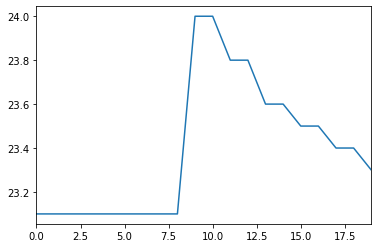

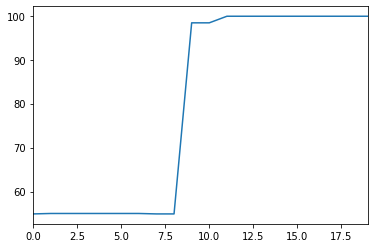

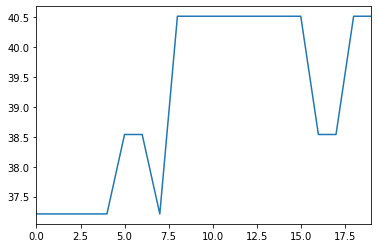

In [33]:
# plotting data
pyplot.figure()
sensor_data_panda["air_temperature"].plot()
pyplot.figure()
sensor_data_panda["air_humidty"].plot()
pyplot.figure()
sensor_data_panda["luminance"].plot()

In [ ]:
## my devices cayenne example

import cayenne.client
import time
import serial
import config

# mydevices dashboard setup
def on_message(message):
    print("message received: " + str(message))
    # If there is an error processing the message return an error string, otherwise return nothing.

# initialise serial interface
ser = serial.Serial(serial_port)
ser.flushInput()

# name and sequence of data
sensor_parameter = ["air_temperature", "air_humidity", "soil_temperature","soil_humidity", "luminance"]

# init data array
sensor_data_panda = pandas.DataFrame(columns=sensor_parameter)

# number of samples to record
numberOfRecordings = 20
sampleNum = 0

client = cayenne.client.CayenneMQTTClient()
client.on_message = on_message
client.begin(config.MQTT_USERNAME, config.MQTT_PASSWORD, config.MQTT_CLIENT_ID)
# For a secure connection use port 8883 when calling client.begin:
# client.begin(MQTT_USERNAME, MQTT_PASSWORD, MQTT_CLIENT_ID, port=8883)

while True:
#     try:
    # read serial byte data
    sensor_data_raw = ser.readline()
    # convert byte data to UTF string
    sensor_data_str = sensor_data_raw[0:len(sensor_data_raw)-2].decode("utf-8")
    # convert UTF string to array
    sensor_data_arr = sensor_data_str.split(",")
    # length fits to parameter names, parse and store
    if len(sensor_data_arr) == len(sensor_parameter):
        # parse
        sensor_data_dict = {sensor_parameter[i]:float(sensor_data_arr[i]) for i in range(len(sensor_parameter))}
        # store
        sensor_data_panda = sensor_data_panda.append(sensor_data_dict,ignore_index=True)

        # upload readings to myDevices Cayenne 
        client.loop()
        client.celsiusWrite(1, sensor_data_dict["air_temperature"])
        client.virtualWrite(2, sensor_data_dict["air_humidity"],"rel_hum","p")
        client.celsiusWrite(3, sensor_data_dict["soil_temperature"])
        client.virtualWrite(4, sensor_data_dict["soil_humidity"],"res","ohm")
        client.luxWrite(5, sensor_data_dict["luminance"])

    else:
        print(sensor_data_raw)
        print("Sensor array length does match expected number of parameters.")
#     except:
#         print("Interrupt")
#         ser.close()
#         break
ser.close()

Connecting to mqtt.mydevices.com:1883
Connected with result code 0
SUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/cmd/+

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/sys/model
Python

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/sys/version
1.1.0

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/1
temp,c=21.2

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/2
rel_hum,p=66.2

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/3
temp,c=-0.0

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/4
res,ohm=65535.0

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/5
lum,lux=2096.42

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221

In [2]:

i=0
timestamp = 0

while True:
  client.loop()

  if (time.time() > timestamp + 10):
    client.celsiusWrite(1, i)
    client.luxWrite(2, i*10)
    client.hectoPascalWrite(3, i+800)
    timestamp = time.time()
    i = i+1

Connecting to mqtt.mydevices.com:1883
Connected with result code 0
SUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/cmd/+

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/sys/model
Python

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/sys/version
1.1.0

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/1
temp,c=1

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/2
lum,lux=10

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/3
bp,hpa=801

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/1
temp,c=2

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/2
lum,lux=20

PUB v1/fdd9f2a0-3065-11e9-8cb9-732fc93af22b/things/9c80c260-d6cb-11e9-8221-599f77add412/data/3

KeyboardInterrupt: 

In [35]:
MQTT_USERNAME

'MQTT_USERNAME'